In [39]:
!pip install langchain

In [40]:
!pip install openai

In [41]:
!pip install langchain-community

In [74]:
!pip install openai

In [76]:
from langchain import OpenAI, ConversationChain
from langchain.memory import ConversationBufferMemory

https://platform.openai.com/api-keys

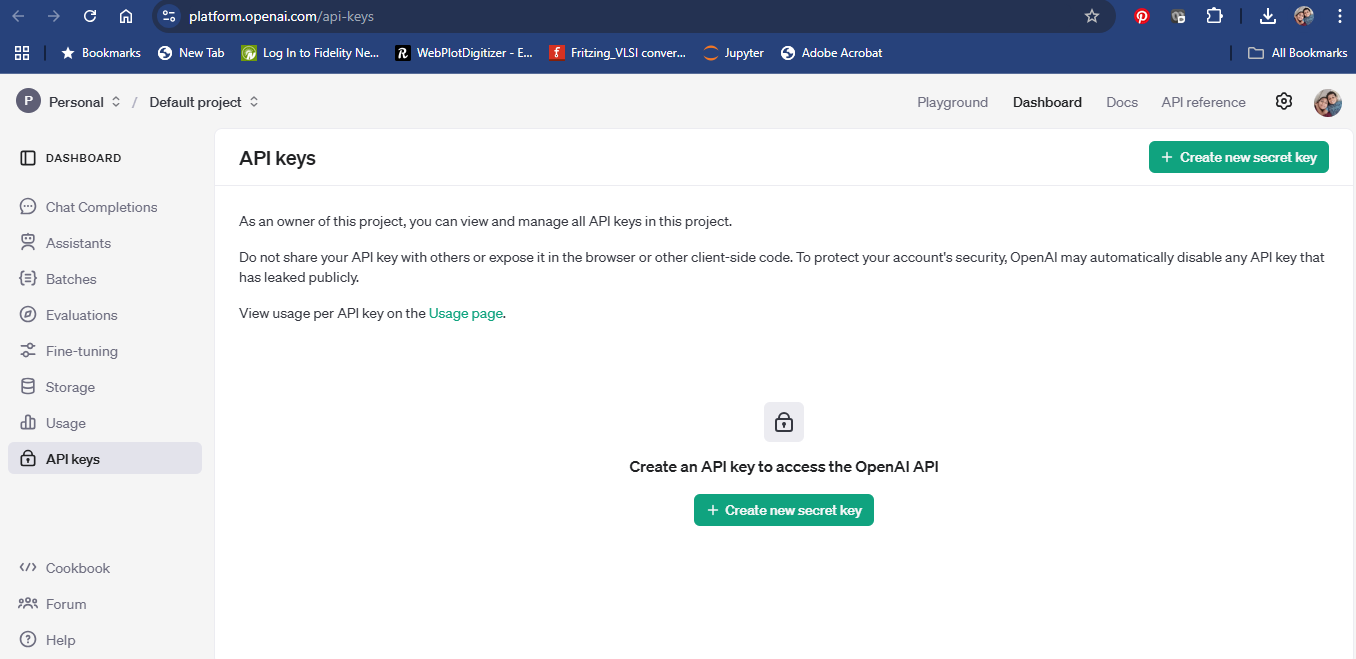

In [78]:
API_KEY=""

In [68]:
import os

In [79]:
os.environ["OPENAI_API_KEY"] = API_KEY

In [80]:
OpenAI.api_key = os.getenv("OPENAI_API_KEY")

In [81]:
from tenacity import (
    retry,
    stop_after_attempt,
    wait_random_exponential,
)

In [82]:
# Initialize the LLM (OpenAI GPT-3.5 in this case)
llm = OpenAI(temperature=0.7, model="gpt-3.5-turbo")

In [83]:
# Set up memory for the chatbot
# This allows the chatbot to remember previous parts of the conversation
memory = ConversationBufferMemory()

In [84]:
# Create a conversation chain
conversation = ConversationChain(
    llm=llm,
    memory=memory,
    verbose=True  # Enables detailed logging for debugging
)

In [85]:
# Start a conversation loop
print("Chatbot: Hello! How can I help you today?")
while True:
    user_input = input("You: ")
    if user_input.lower() in ["exit", "quit"]:
        print("Chatbot: Goodbye! Have a great day!")
        break

    # Generate a response using the LLM with rate limiting
    @retry(wait=wait_random_exponential(min=2, max=20), stop=stop_after_attempt(6))
    def generate_response():
        return conversation.predict(input=user_input)
    response = generate_response()
    print(f"Chatbot: {response}")

Chatbot: Hello! How can I help you today?
You: does god exist


> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: does god exist
AI:


> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: does god exist
AI:


> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know t

RetryError: RetryError[<Future at 0x7985d04a8700 state=finished raised RateLimitError>]